In [1]:
from keras.datasets import cifar10
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

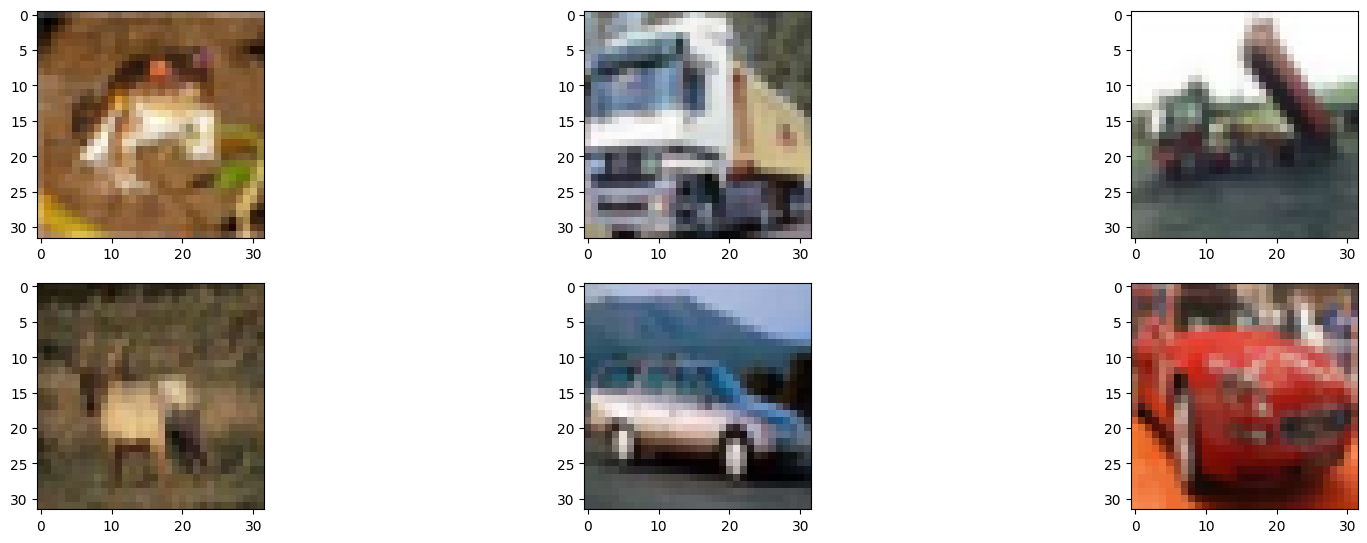

In [2]:
import matplotlib.pyplot as plt
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [4]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [5]:
train_Y=to_categorical(train_Y)
test_Y=to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
sgd = SGD(learning_rate=0.01, momentum=0.9, decay=0.01/25, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


C:\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,210,090 (16.06 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 47ms/step - accuracy: 0.3082 - loss: 1.9008 - val_accuracy: 0.4900 - val_loss: 1.4107
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.5136 - loss: 1.3649 - val_accuracy: 0.5773 - val_loss: 1.1897
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.5869 - loss: 1.1718 - val_accuracy: 0.6097 - val_loss: 1.1091
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6426 - loss: 1.0120 - val_accuracy: 0.6389 - val_loss: 1.0357
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.6834 - loss: 0.8980 - val_accuracy: 0.6559 - val_loss: 0.9981
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7250 - loss: 0.7939 - val_accuracy: 0.6436 - val_loss: 1.0544
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7495 - loss: 0.7141 - val_accuracy: 0.6766 - val_loss: 0.9624
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7875 -

In [10]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6735 - loss: 1.0365
67.76999831199646


In [11]:
model.save("model1_cifar_10epoch.h5")

In [16]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('model1_cifar_10epoch.h5')  # Replace with your model's file path

# Dictionary mapping class indices to class names
results = {
   0: 'aeroplane',
   1: 'automobile',
   2: 'bird',
   3: 'cat',
   4: 'deer',
   5: 'dog',
   6: 'frog',
   7: 'horse',
   8: 'ship',
   9: 'truck'
}

# Load and resize the image
im = Image.open("cat.webp")
im = im.resize((32, 32))

# Convert image to numpy array and expand dimensions to match model input
im = np.expand_dims(im, axis=0)
im = np.array(im)

# Make prediction
pred_prob = model.predict(im)
pred = np.argmax(pred_prob,axis=1)[0]

# Print the predicted class and its corresponding name
print("Predicted class:", pred)
print("Predicted class name:", results[pred])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Predicted class: 3
Predicted class name: cat


In [ ]:
#GUI

In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

# Load the trained model to classify the images
from keras.models import load_model
model = load_model('model1_cifar_10epoch.h5')

# Dictionary to label all the CIFAR-10 dataset classes.
classes = { 
    0: 'aeroplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Initialise GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Image Classification CIFAR10')
top.configure(background='#CDCDCD')
label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32, 32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict(image)[0]
    class_idx = numpy.argmax(pred)
    sign = classes[class_idx]
    print(sign)
    label.configure(foreground='#011638', text=sign)

def show_classify_button(file_path):
    classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)

def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width() / 2.25), (top.winfo_height() / 2.25)))
        im = ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image = im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload = Button(top, text="Upload an image", command=upload_image, padx=10, pady=5)
upload.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
upload.pack(side=BOTTOM, pady=50)
sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)
heading = Label(top, text="Image Classification", pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()
top.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
dog
